## Sumário

[Implementação](#)

[Definição de Topologia da Rede](#)

[Definir otimizador, função custo e modo do treinamento](#)

[Referências](#)

## Imports

In [14]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

%matplotlib inline

## Implementação

### Leitura, visualização e pré-processamento do dataset
Ao utilizar Redes Neurais para imagens, cada entrada é um pixel. Dessa forma, após a leitura do dataset, precisa-se descobrir as dimensões da imagem, a quantidade de instâncias, quantas classes e entradas são necessárias para o problema.

Feito isso, algumas técnicas de pré-processamento devem ser utilizadas para melhores resultados, dentre eles converter a imagem para tons de cinza e normalizar.

11493376/11490434 [==============================] - 40s 3us/step


((60000, 784), (60000,), (10000, 784), (10000,))

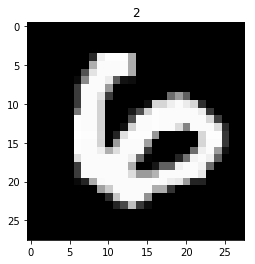

In [2]:
# carrega dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[9000], cmap=plt.get_cmap('gray'))
plt.title(y_train[5])

# normalizando entrada
x_train, x_test = x_train.reshape(-1,784)/255.0, x_test.reshape(-1,784)/255.0

x_train.shape, y_train.shape, x_test.shape, y_test.shape

### Conversão do array de predições Y

Baseado no número de classes do problema, represente a saída como one-hot encoding.

In [4]:
# numero de classes
D_out = 10
# one hot encoding
y_train_oh, y_test_oh = to_categorical(y_train, D_out), to_categorical(y_test, D_out)

y_train_oh.shape, y_test_oh.shape

((60000, 10), (10000, 10))

### Definição de Topologia da Rede
Mostre as três arquiteturas que serão utilizadas para resolver o problema. As arquiteturas devem ser simples de forma a retornar bons resultados com a menor quantidade necessária de neurônios e camadas. As três arquiteturas devem variar apenas quanto ao número de neurônios e camadas (incluindo regularização). Baseado nisso, explique:

* Quantos neurônios serão utilizados em cada camada?
* Quantas camadas serão utilizadas?
* É necessário utilizar regularização? Se sim explique a técnica que foi utilizada e o impacto nos resultados
* Qual função de ativação será utilizada? Escolha duas funções de ativação e explique os resultados obtidos

#### 1.1 Arquitetura

In [5]:
classifier = Sequential()
classifier.add(Dense(units=20, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(units=20, activation='relu'))
classifier.add(Dense(D_out, activation='sigmoid'))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [6]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
history = classifier.fit(x=x_train, y=y_train_oh, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))
history.history.keys()

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 17s 278us/step - loss: 0.4395 - acc: 0.8631 - val_loss: 0.2631 - val_acc: 0.9226
Epoch 2/30
60000/60000 [==============================] - 15s 248us/step - loss: 0.2376 - acc: 0.9311 - val_loss: 0.2147 - val_acc: 0.9354
Epoch 3/30
60000/60000 [==============================] - 14s 235us/step - loss: 0.1975 - acc: 0.9416 - val_loss: 0.1798 - val_acc: 0.9450
Epoch 4/30
60000/60000 [==============================] - 14s 235us/step - loss: 0.1729 - acc: 0.9481 - val_loss: 0.1689 - val_acc: 0.9498
Epoch 5/30
60000/60000 [==============================] - 14s 234us/step - loss: 0.1576 - acc: 0.9530 - val_loss: 0.1704 - val_acc: 0.9482
Epoch 6/30
60000/60000 [==============================] - 15s 248us/step - loss: 0.1456 - acc: 0.9574 - val_loss: 0.1633 - val_acc: 0.9514
Epoch 7/30
60000/60000 [==============================] - 14s 234us/step - loss: 0.1339 - acc: 0.9615 - val_loss: 0.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0.5,0,'epoch')

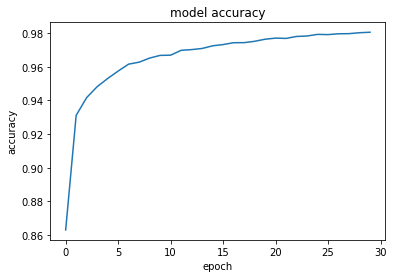

In [7]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

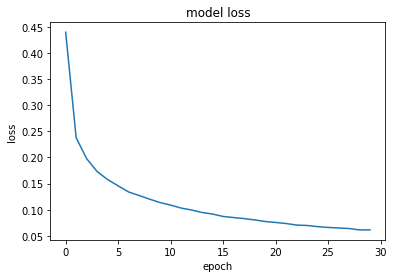

In [8]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

#### 1.2 Arquitetura

In [10]:
classifier = Sequential()
classifier.add(Dense(units=20, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(units=30, activation='relu'))
classifier.add(Dense(D_out, activation='softmax'))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_8 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
Total params: 16,640
Trainable params: 16,640
Non-trainable params: 0
_________________________________________________________________


In [11]:
classifier.compile(optimizer='SGD', loss='categorical_crossentropy',  metrics=['accuracy'])
history = classifier.fit(x=x_train, y=y_train_oh, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))
history.history.keys()

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 14s 229us/step - loss: 0.8219 - acc: 0.7687 - val_loss: 0.3804 - val_acc: 0.8931
Epoch 2/30
60000/60000 [==============================] - 14s 228us/step - loss: 0.3531 - acc: 0.9001 - val_loss: 0.3044 - val_acc: 0.9132
Epoch 3/30
60000/60000 [==============================] - 14s 237us/step - loss: 0.3056 - acc: 0.9118 - val_loss: 0.2767 - val_acc: 0.9219
Epoch 4/30
60000/60000 [==============================] - 14s 227us/step - loss: 0.2787 - acc: 0.9199 - val_loss: 0.2584 - val_acc: 0.9244
Epoch 5/30
60000/60000 [==============================] - 14s 227us/step - loss: 0.2575 - acc: 0.9264 - val_loss: 0.2409 - val_acc: 0.9313
Epoch 6/30
60000/60000 [==============================] - 14s 227us/step - loss: 0.2393 - acc: 0.9316 - val_loss: 0.2330 - val_acc: 0.9325
Epoch 7/30
60000/60000 [==============================] - 14s 229us/step - loss: 0.2239 - acc: 0.9361 - val_loss: 0.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0.5,0,'epoch')

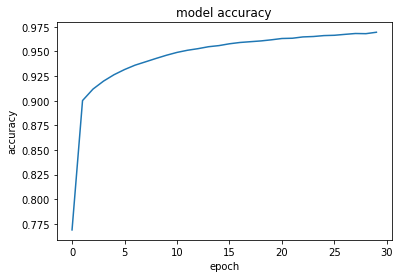

In [12]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

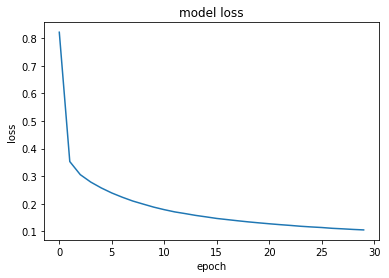

In [13]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

#### 1.3 Arquitetura

In [15]:
classifier = Sequential()
classifier.add(Dense(units=30, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(units=30, activation='relu'))
classifier.add(Dropout(rate=0.5))
classifier.add(Dense(D_out, activation='softmax'))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_11 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


In [16]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
history = classifier.fit(x=x_train, y=y_train_oh, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))
history.history.keys()

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 17s 283us/step - loss: 0.7028 - acc: 0.7737 - val_loss: 0.2420 - val_acc: 0.9269
Epoch 2/30
60000/60000 [==============================] - 17s 278us/step - loss: 0.4040 - acc: 0.8788 - val_loss: 0.1928 - val_acc: 0.9405
Epoch 3/30
60000/60000 [==============================] - 17s 278us/step - loss: 0.3402 - acc: 0.8999 - val_loss: 0.1715 - val_acc: 0.9484
Epoch 4/30
60000/60000 [==============================] - 17s 277us/step - loss: 0.3027 - acc: 0.9086 - val_loss: 0.1617 - val_acc: 0.9491
Epoch 5/30
60000/60000 [==============================] - 17s 279us/step - loss: 0.2797 - acc: 0.9158 - val_loss: 0.1564 - val_acc: 0.9531
Epoch 6/30
60000/60000 [==============================] - 17s 277us/step - loss: 0.2641 - acc: 0.9217 - val_loss: 0.1733 - val_acc: 0.9532
Epoch 7/30
60000/60000 [==============================] - 17s 279us/step - loss: 0.2483 - acc: 0.9253 - val_loss: 0.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])